# Iris Dataset Notebook


## Import all the packages required for the dataset

In [1]:
# Building neural networks
import keras as kr

# Load data sets - data procesing
import pandas as pd

# Encoding categorical variables.
import sklearn.preprocessing as pre

# Splitting into training and test sets.
import sklearn.model_selection as mod

# See the relation between each pair of features
import seaborn as sns

# Linear algebra
import numpy as np

# Visualise data
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


## Read the iris dataset

In [2]:
# Importing/loading the dataset
dataset = pd.read_csv("https://raw.githubusercontent.com/ianmcloughlin/datasets/master/iris.csv")

# Shows the dataset
dataset

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


## Information about the dataset
* 150 iris flowers of 3 species were identified and used for this dataset
    * setosa
    * virginica
    * versicolor
* There are 4 columns included of the flowers' measurements
    * sepal length
    * sepal width
    * petals length
    * petals width
* The 5th column in the dataset is the flower species - named as class in this case

**50 flowers of each species were used for this dataset**

In [3]:
# Source code adapted from: 
# - https://medium.com/codebagng/basic-analysis-of-the-iris-data-set-using-python-2995618a6342
# - https://www.kaggle.com/jchen2186/machine-learning-with-iris-dataset
# - https://www.kaggle.com/adityabhat24/iris-data-analysis-and-machine-learning-python

In [4]:
# Shows head of the dataset - first 5
dataset.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
# Information about the dataset
dataset.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
class           150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [6]:
# Statistics summarizing dispersion & shape of dataset’s distribution
dataset.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
# Amount of rows and columns of dataset
dataset.shape

(150, 5)

In [8]:
# Object containing counts of unique values
dataset['class'].value_counts()

setosa        50
versicolor    50
virginica     50
Name: class, dtype: int64

## Visualise
--- **explain visualisation** ---

C:\Users\crist\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


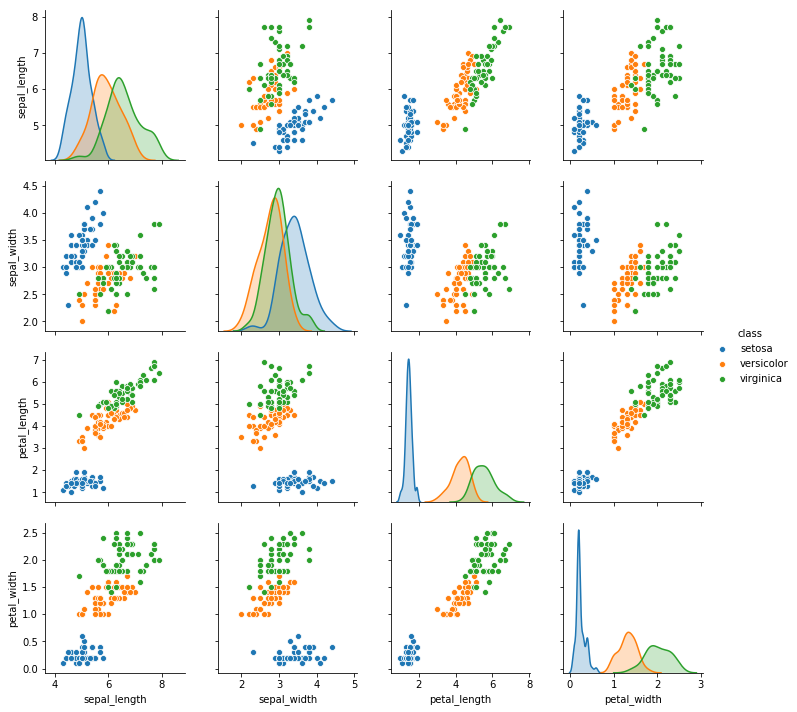

In [9]:
# Show the iris dataset using pairplot
sns.pairplot(dataset, hue='class', markers='o')

## Inputs

## Outputs

## Split

## Train

## Predict

## Evaluate